In [ ]:
!unzip master.csv.zip

Archive:  master.csv.zip
replace master.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: master.csv              


In [ ]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
data = pd.read_csv('master.csv')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [ ]:
data.shape

(31756, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [ ]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,31756.000000,30556.000000,3.175600e+04,31756.000000,12300.000000,31756.000000
mean,2003.395390,237.136242,7.217454e+06,11.716668,0.793666,17588.954606
std,9.760604,867.956107,5.799323e+07,21.590926,0.097480,19464.861140
min,1985.000000,0.000000,2.780000e+02,0.000000,0.377790,251.000000
25%,1996.000000,3.000000,1.288210e+05,0.370000,0.727000,3765.000000
50%,2004.000000,25.000000,5.468325e+05,4.285000,0.800457,10062.000000
75%,2011.000000,132.000000,2.908763e+06,14.560000,0.874000,25622.000000
max,2020.000000,22338.000000,1.411100e+09,515.092734,0.975114,126352.000000


In [ ]:
data.rename(columns = {'suicides/100k pop':'suicide_rate',' gdp_for_year ($) ': 'gdp_for_year','gdp_per_capita ($)': 'gdp_per_capita'}, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         31756 non-null  object 
 1   year            31756 non-null  int64  
 2   sex             31756 non-null  object 
 3   age             31756 non-null  object 
 4   suicides_no     30556 non-null  float64
 5   population      31756 non-null  int64  
 6   suicide_rate    31756 non-null  float64
 7   country-year    31756 non-null  object 
 8   HDI for year    12300 non-null  float64
 9   gdp_for_year    31756 non-null  object 
 10  gdp_per_capita  31756 non-null  float64
 11  generation      31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [ ]:
data.age.value_counts()

age
15-24 years    5298
35-54 years    5298
75+ years      5298
25-34 years    5298
55-74 years    5298
5-14 years     5266
Name: count, dtype: int64

In [ ]:
data.generation.value_counts()

generation
Generation X       7720
Silent             7020
Millenials         5844
Boomers            5646
G.I. Generation    4056
Generation Z       1470
Name: count, dtype: int64

In [ ]:
country = data.country.unique()
print("Number of countries:", len(country))
country

Number of countries: 114


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'suicides_no'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'suicide_rate'}>],
       [<Axes: title={'center': 'HDI for year'}>,
        <Axes: title={'center': 'gdp_per_capita'}>]], dtype=object)

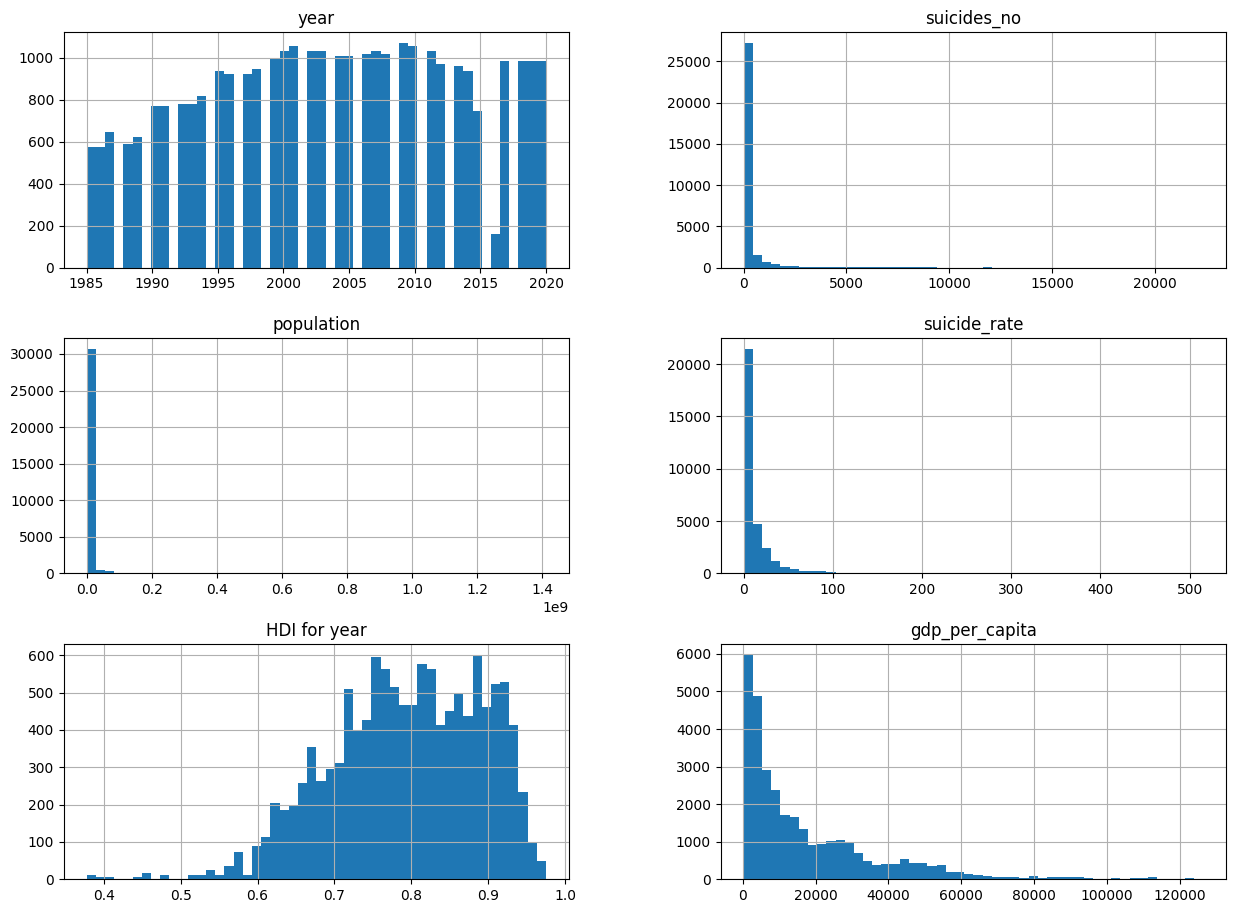

In [ ]:
data.hist(bins = 50,figsize = (15,11))

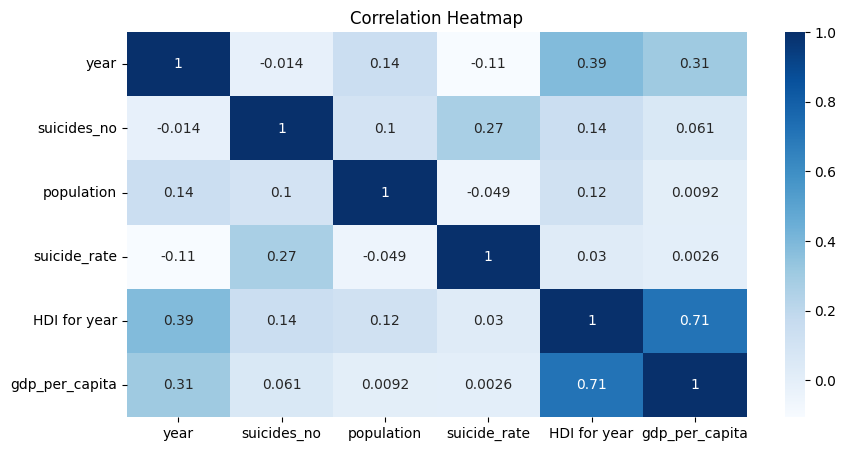

In [ ]:
#Correlation heatmap
numeric_data = data.select_dtypes(include=[np.number]) # to select only numerical cols in the df to create Heatmap

plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True,  cmap ='Blues')
plt.title('Correlation Heatmap')
plt.show()

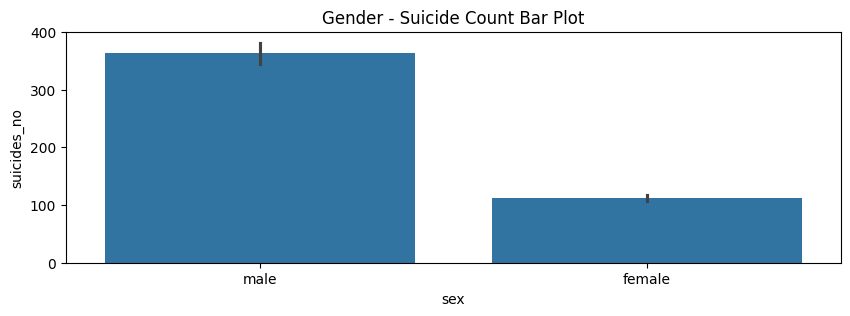

In [ ]:
#Gender and suicide count bar plot

plt.figure(figsize=(10, 3))
sns.barplot(x='sex', y='suicides_no', data=data)
plt.title('Gender - Suicide Count Bar Plot')
plt.show()

The above bar plot shows that the suicide cases are more in male population.

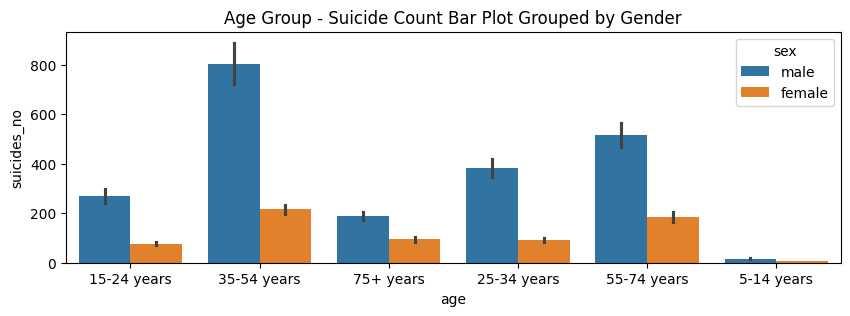

In [ ]:
#Age Group - Count Bar Plot Grouped by Gender

plt.figure(figsize=(10,3))
sns.barplot(x = "age", y = "suicides_no", hue = "sex", data = data)
plt.title("Age Group - Suicide Count Bar Plot Grouped by Gender")
plt.show()

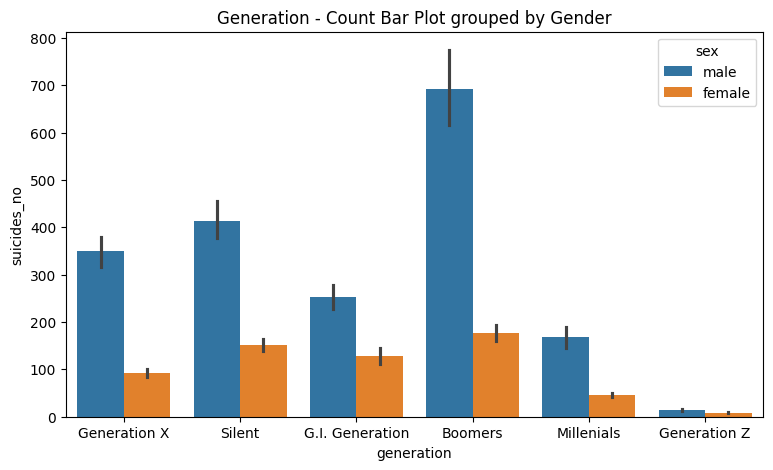

In [ ]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicides_no", hue = "sex", data = data)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

Irrespective of age group and generation, it can be seen that men commit suicide more than women

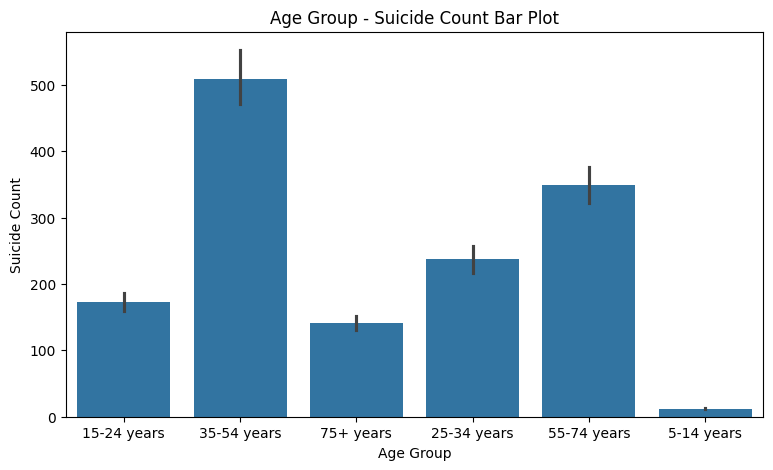

In [ ]:
# Age Group and Suicide count bar plot

plt.figure(figsize=(9,5))
sns.barplot(x=data['age'], y=data['suicides_no'])
plt.xlabel('Age Group')
plt.ylabel('Suicide Count')
plt.title('Age Group - Suicide Count Bar Plot')
plt.show()

It can be seen that suicides are commited considerably high in the 35-54 age group followed by 55-74 age group

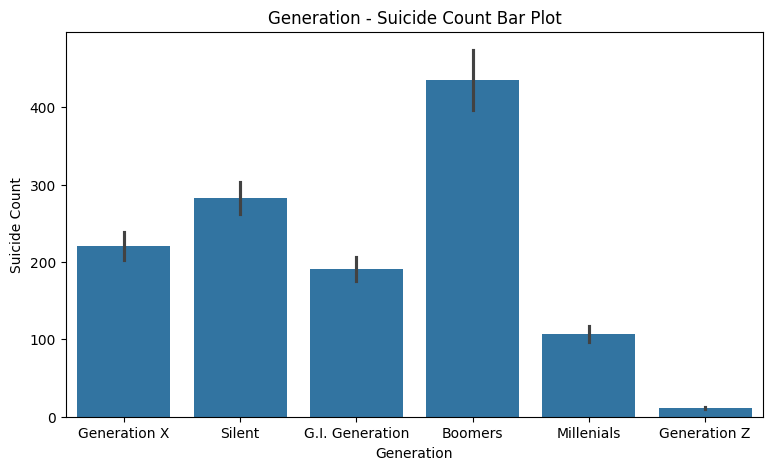

In [ ]:
#Generation & Suicide Count Bar Plot

plt.figure(figsize=(9,5))
sns.barplot(x=data['generation'], y=data['suicides_no'])
plt.xlabel('Generation')
plt.ylabel('Suicide Count')
plt.title('Generation - Suicide Count Bar Plot')
plt.show()

Suicide cases are more in the Boomers generation. This generation is often defined as people born from 1946 to 1964.

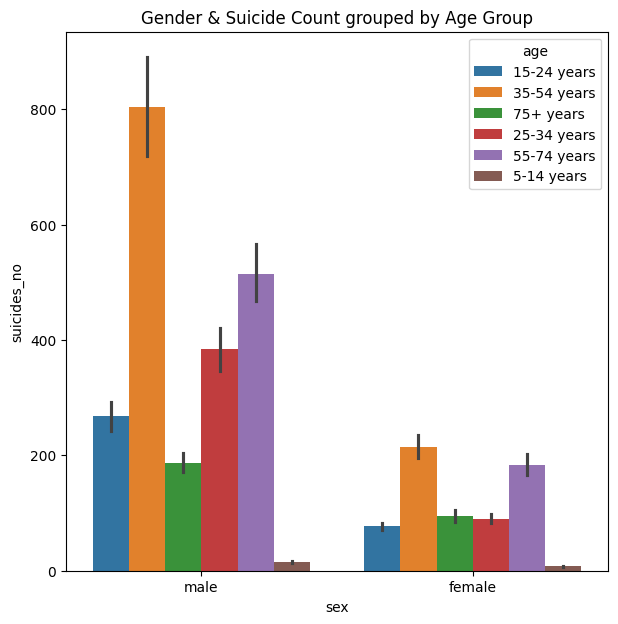

In [ ]:
#Gender & Suicide Count grouped by Age Group bar plot

plt.figure(figsize=(7,7))
sns.barplot(y="suicides_no", x="sex", hue="age", data=data)
plt.title('Gender & Suicide Count grouped by Age Group')
plt.show()

From the above graph, we can infer that 35-54 years age group is more prone to suicides irrespective of the gender followed by 55-74 years age group.

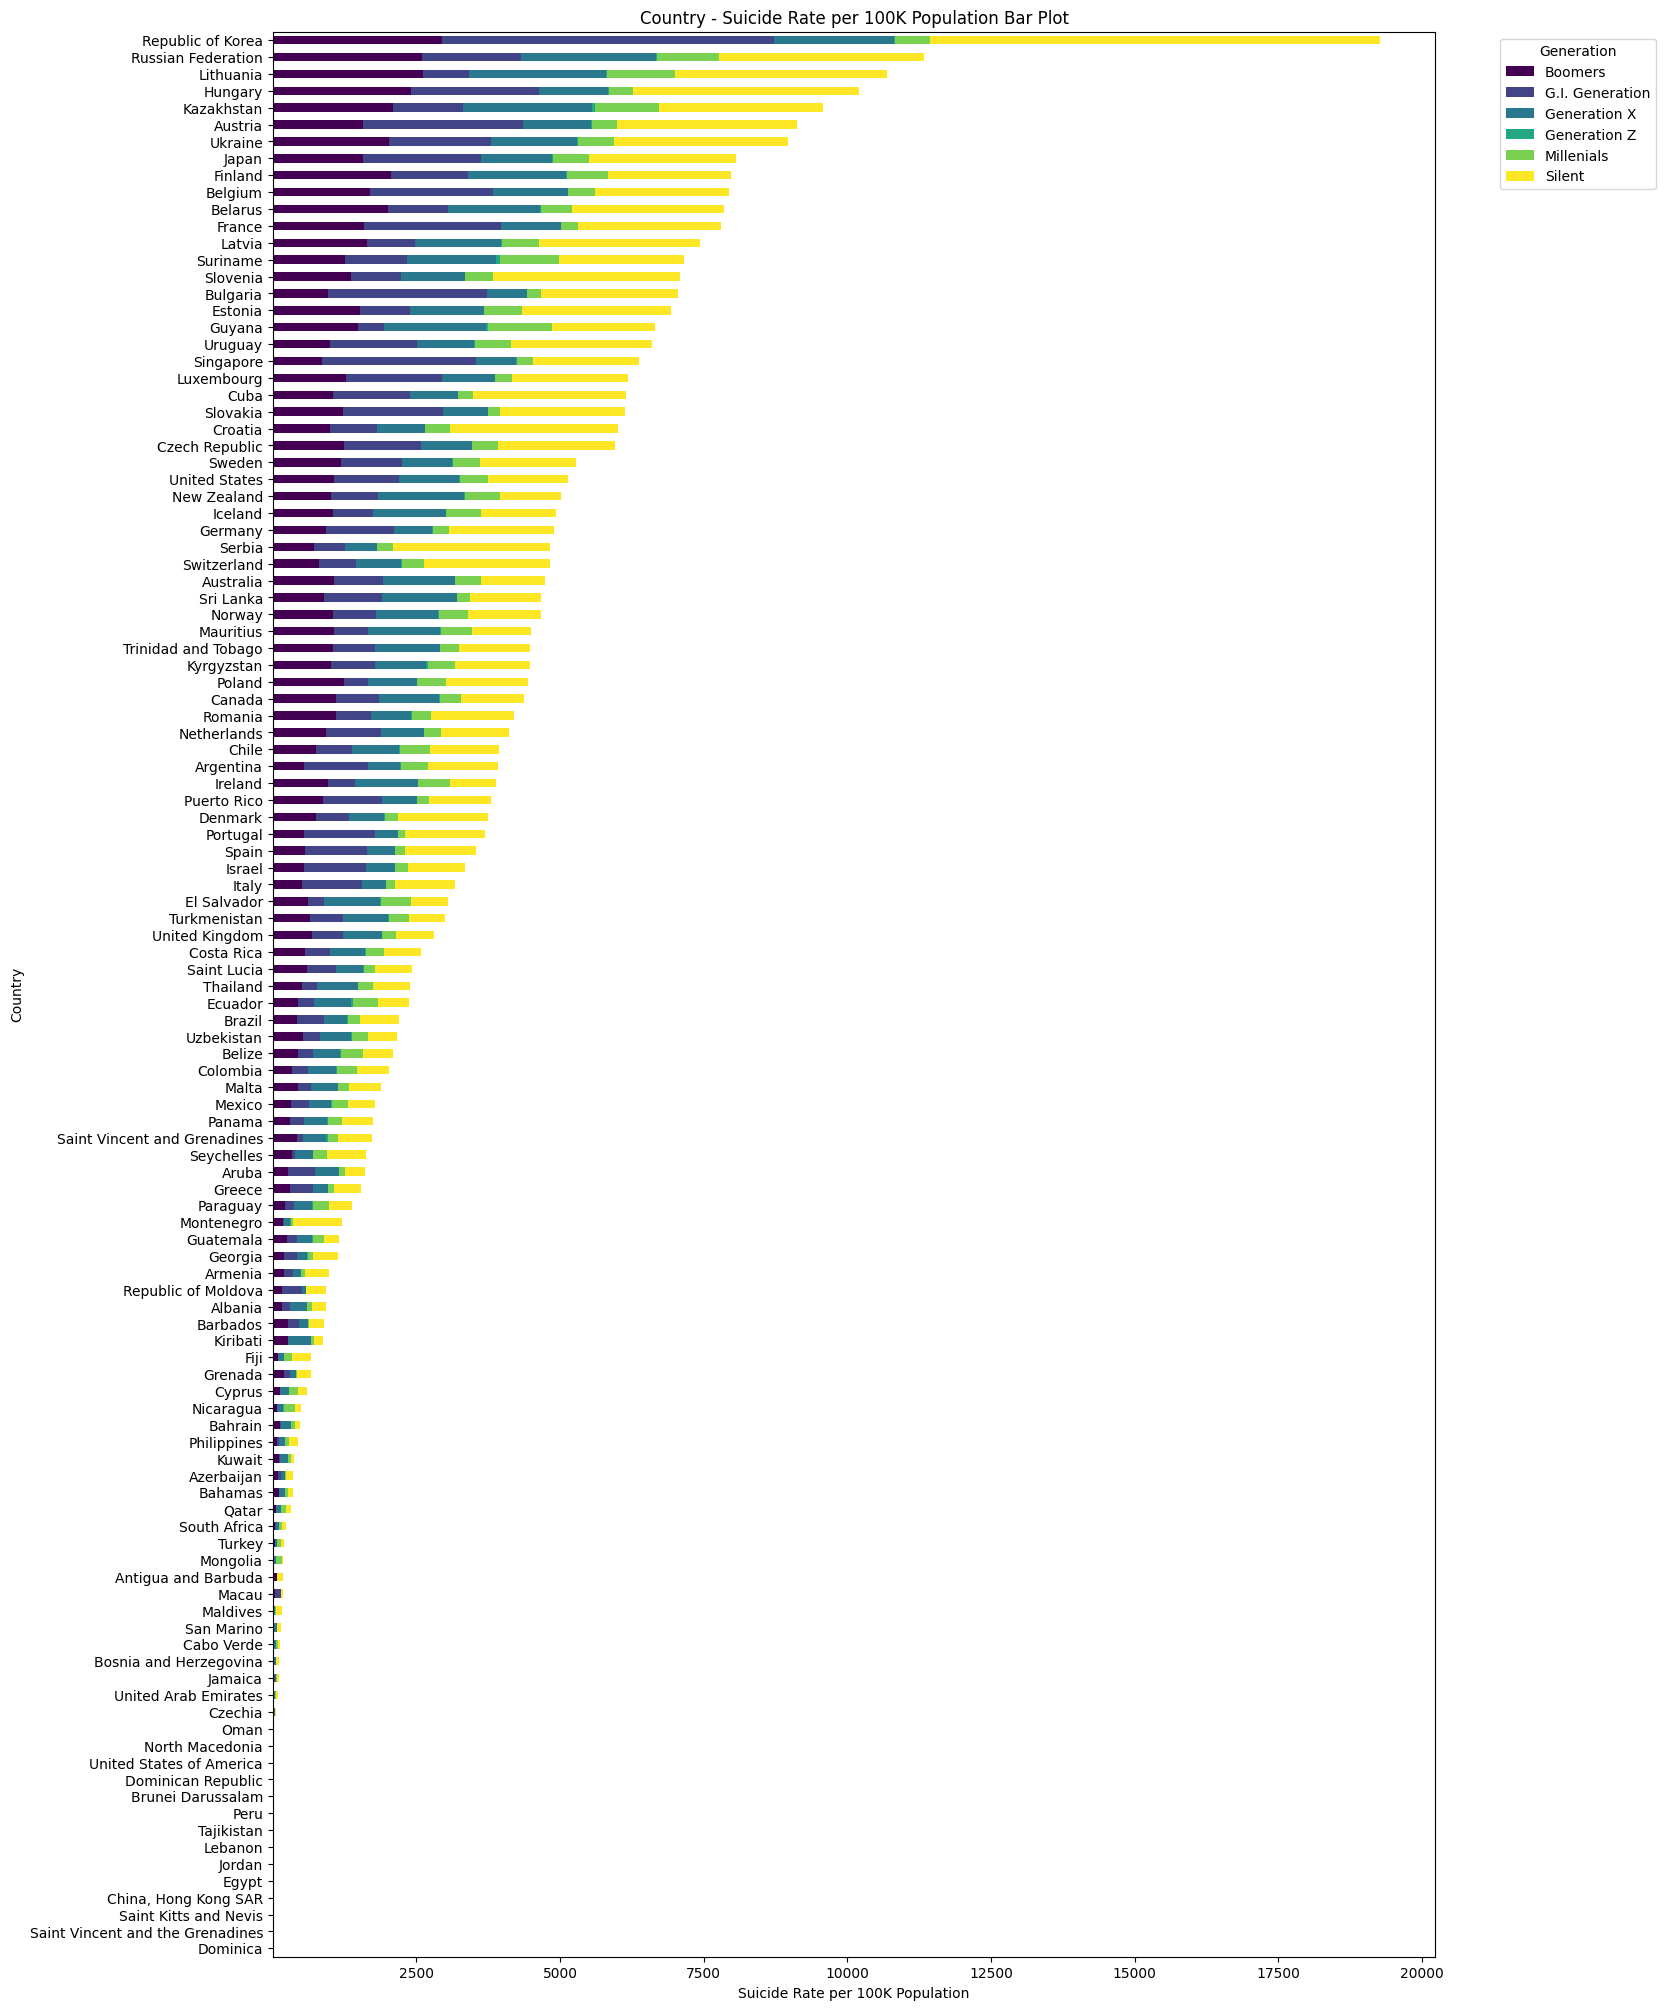

In [ ]:
# Country and suicide rate Stacked Bar Chart grouped by generation

# Pivot the data to get the suicide rates for each age group in separate columns
pivot_data = data.pivot_table(values='suicide_rate', index='country', columns='generation', aggfunc='sum').fillna(0)

# Calculate the total suicide rate for each country
pivot_data['total'] = pivot_data.sum(axis=1)

# Sort the DataFrame by the total suicide rate in Ascending order
pivot_data = pivot_data.sort_values(by='total', ascending=True)

# Drop the 'total' column before plotting
pivot_data = pivot_data.drop(columns='total')

# Plot the stacked bar chart
pivot_data.plot(kind='barh', stacked=True, figsize=(15, 25), cmap='viridis')
plt.xlabel('Suicide Rate per 100K Population')
plt.ylabel('Country')
plt.title('Country - Suicide Rate per 100K Population Bar Plot')
plt.legend(title='Generation', bbox_to_anchor=(1.05, 1))
plt.show()


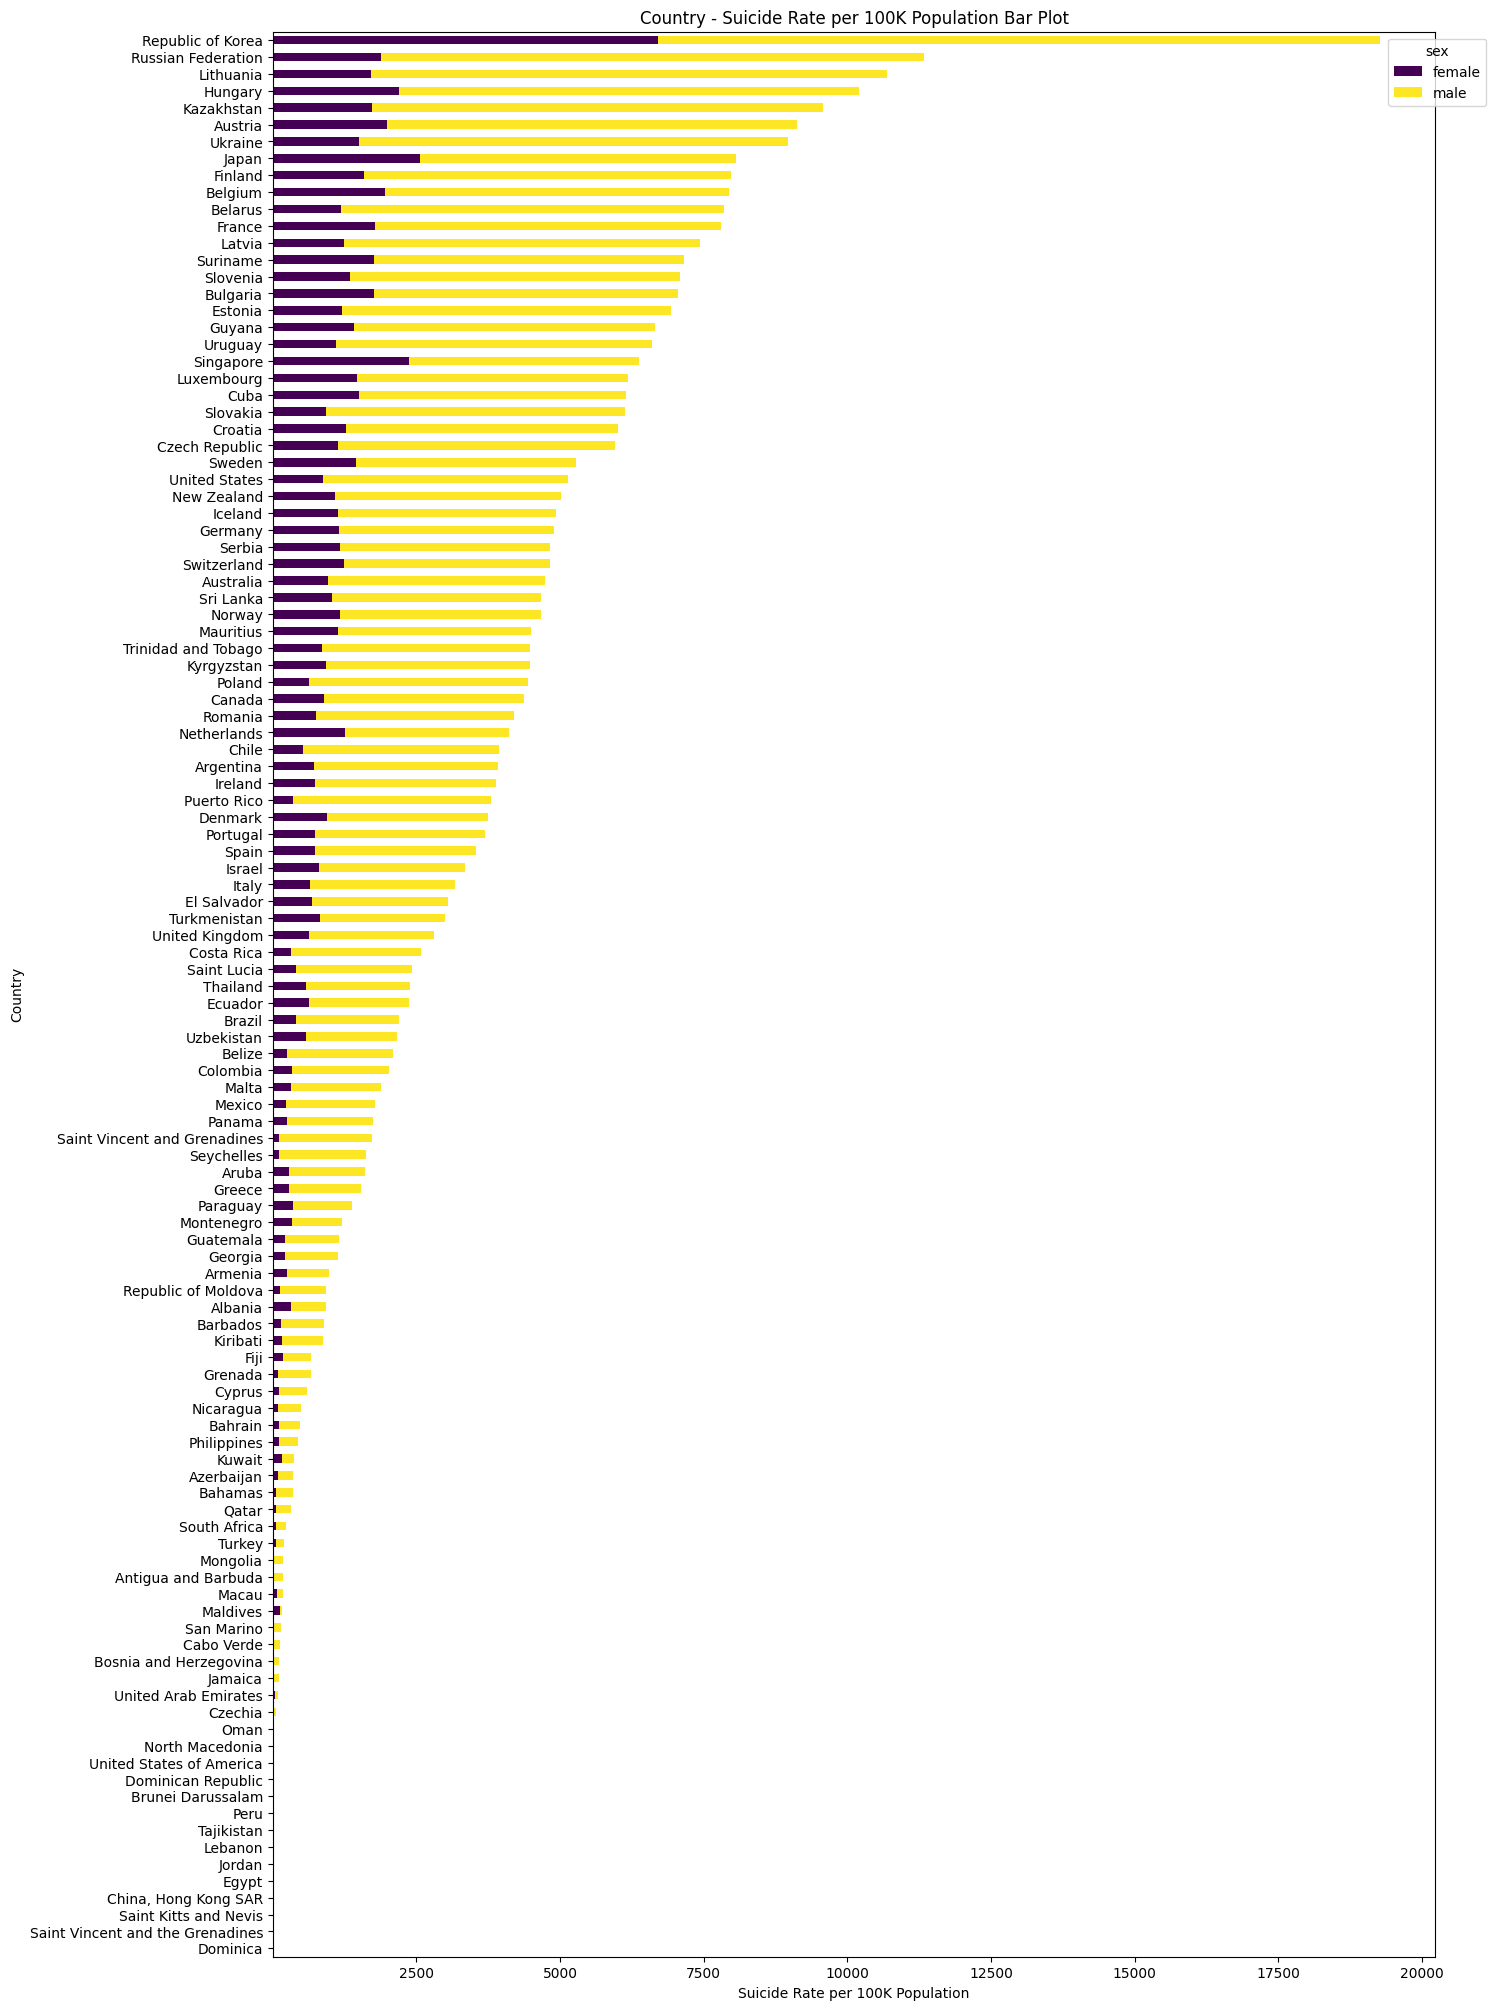

In [ ]:
# Country and suicide rate Stacked Bar Chart grouped by sex

# Pivot the data to get the suicide rates for each age group in separate columns
pivot_data = data.pivot_table(values='suicide_rate', index='country', columns='sex', aggfunc='sum').fillna(0)

# Calculate the total suicide rate for each country
pivot_data['total'] = pivot_data.sum(axis=1)

# Sort the DataFrame by the total suicide rate in Ascending order
pivot_data = pivot_data.sort_values(by='total', ascending=True)

# Drop the 'total' column before plotting
pivot_data = pivot_data.drop(columns='total')

# Plot the stacked bar chart
pivot_data.plot(kind='barh', stacked=True, figsize=(15, 25), cmap='viridis')
plt.xlabel('Suicide Rate per 100K Population')
plt.ylabel('Country')
plt.title('Country - Suicide Rate per 100K Population Bar Plot')
plt.legend(title='sex', bbox_to_anchor=(1.05, 1))
plt.show()


The above plots shows that the country with the highest suicide rate is the Republic of Korea followed by the Russian Federation and Lithuania.

<Axes: xlabel='year'>

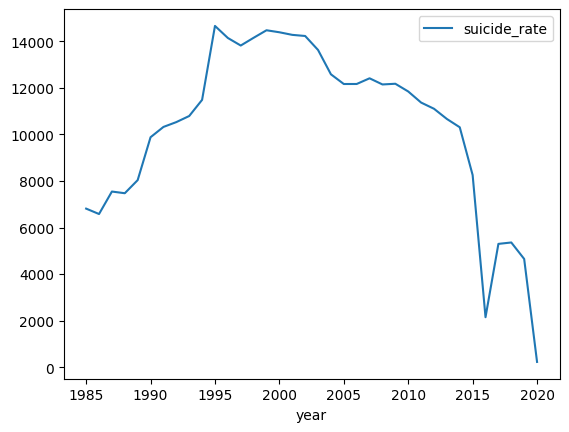

In [ ]:
#Line plot of year and suicide_rate

data[['year','suicide_rate']].groupby(['year']).sum().plot()

The observations from the above plot are that the suicide rate had grown rapidly from around the year 1990 & the rate of suicide has drastically reduced in year 2020.

In [ ]:
#checking the data for null or missing values

data.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no        1200
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [ ]:
# Filling missing values in suicides_no using median

median_suicides_no = data['suicides_no'].median()
data['suicides_no'].fillna(median_suicides_no, inplace=True)

In [ ]:
data = data.drop(['HDI for year'], axis = 1)
data.shape

(31756, 11)

In [ ]:
data = data.drop(['country-year'], axis = 1)
data.shape

(31756, 10)

The non-numerical labeled columns - country, year, sex, age and generation are converted to numerical labels by Label Encoding.


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age', 'sex', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    data[column] = le.fit_transform(data[column])

In [ ]:
#creating a copy of dataset for statistical test

stat_data = data.copy()
stat_data

,country,year,sex,age,suicides_no,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21.0,312900,6.710000,"2,15,66,24,900",796.000000,2
1,0,2,1,2,16.0,308000,5.190000,"2,15,66,24,900",796.000000,5
2,0,2,0,0,14.0,289700,4.830000,"2,15,66,24,900",796.000000,2
3,0,2,1,5,1.0,21800,4.590000,"2,15,66,24,900",796.000000,1
4,0,2,1,1,9.0,274300,3.280000,"2,15,66,24,900",796.000000,0
...,...,...,...,...,...,...,...,...,...,...
31751,107,32,0,5,256.0,44831135,0.571032,1.12E+11,2638.326055,1
31752,109,32,0,5,104.0,66058859,0.157435,2.70E+12,40857.755580,1
31753,111,32,0,5,501.0,325122128,0.154096,1.95E+13,60109.655730,1
31754,112,32,0,5,14.0,3422200,0.409094,64233966861,18690.893840,1


In [ ]:
data.dtypes

country             int64
year                int64
sex                 int64
age                 int64
suicides_no       float64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita    float64
generation          int64
dtype: object

In [ ]:
# Converting the column 'gdp_for_year' to float from object
data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)

Standardizing all Numerical columns - suicides_no, population, suicide_rate, gdp_per_year and gdp_per_capita

In [ ]:
#Scaling the numerical data columns with RobustScalar

numerical = ['suicides_no', 'population', 'suicide_rate',
              'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
data[numerical] = rc.fit_transform(data[numerical])

In [ ]:
data.head(10)

,country,year,sex,age,suicides_no,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,-0.033333,-0.084150,0.170895,-0.194564,-0.423937,2
1,0,2,1,2,-0.075000,-0.085913,0.063777,-0.194564,-0.423937,5
2,0,2,0,0,-0.091667,-0.092496,0.038407,-0.194564,-0.423937,2
3,0,2,1,5,-0.200000,-0.188865,0.021494,-0.194564,-0.423937,1
4,0,2,1,1,-0.133333,-0.098035,-0.070825,-0.194564,-0.423937,0
5,0,2,0,5,-0.200000,-0.183900,-0.103946,-0.194564,-0.423937,1
6,0,2,0,2,-0.158333,-0.096417,-0.150458,-0.194564,-0.423937,5
7,0,2,0,1,-0.175000,-0.104187,-0.192037,-0.194564,-0.423937,0
8,0,2,1,4,-0.200000,-0.147245,-0.250529,-0.194564,-0.423937,1
9,0,2,0,3,-0.208333,-0.084834,-0.301973,-0.194564,-0.423937,2


In [ ]:
#Train - Test Split (80-20)

y = data['suicide_rate']
X = data.drop('suicide_rate',axis=1)
X.shape, y.shape

((31756, 9), (31756,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((25404, 9), (6352, 9))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
#holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []
#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

Linear Regression


In [ ]:
# Linear regression model
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.244
Linear Regression: Accuracy on test Data: 0.260

Linear Regression: The RMSE of the training set is: 1.3218842045356223
Linear Regression: The RMSE of the testing set is: 1.313903710005465


In [ ]:
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)

Decision Tree

In [ ]:
# Decision Tree regression model
from sklearn.tree import DecisionTreeRegressor

# instantiate the model
tree = DecisionTreeRegressor(max_depth=9)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.967
Decision Tree: Accuracy on test Data: 0.957

Decision Tree: The RMSE of the training set is: 0.27775368409167694
Decision Tree: The RMSE of the testing set is: 0.3166494165604382


In [ ]:
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

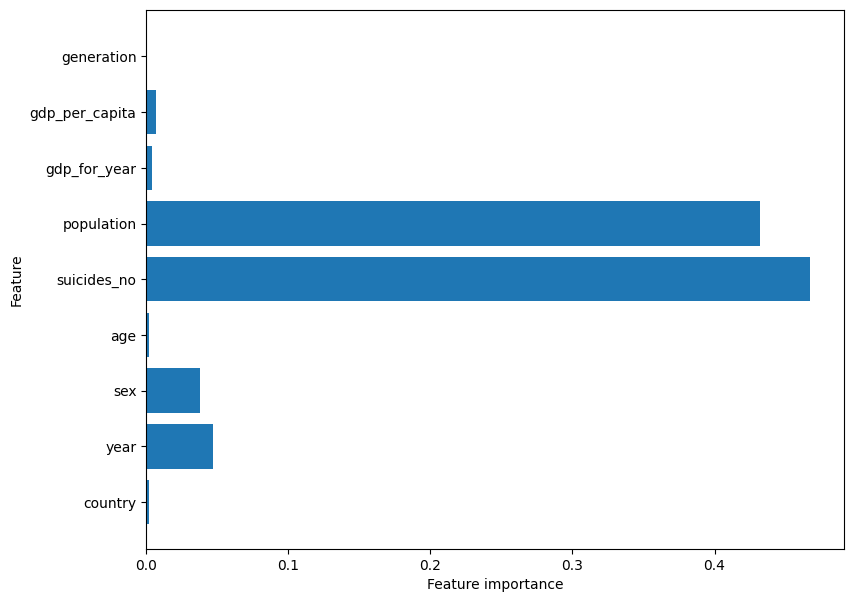

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

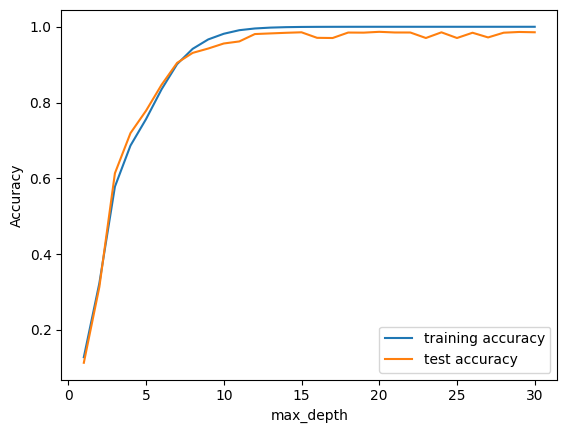

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
  # fit the model
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(tree.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

Random Forest


In [ ]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.983
Random Forest: Accuracy on test Data: 0.979

Random Forest: The RMSE of the training set is:  0.19877104938446485
Random Forest: The RMSE of the testing set is:  0.2201212116686148


In [ ]:
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

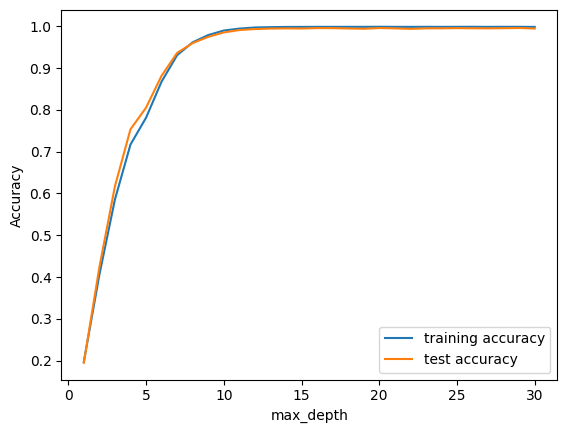

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
  # fit the model
  forest = RandomForestRegressor(max_depth=n)
  forest.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(forest.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

Gradient Boosted Regression Trees

In [ ]:
# Gradient Boosted Regression Trees model
from sklearn.ensemble import GradientBoostingRegressor

# instantiate the model
gbrt = GradientBoostingRegressor(learning_rate=0.5)

# fit the model
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5)

In [ ]:
#predicting the target value from the model for the samples
y_test_gbrt = gbrt.predict(X_test)
y_train_gbrt = gbrt.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_gbrt = gbrt.score(X_train, y_train)
acc_test_gbrt = gbrt.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_gbrt = np.sqrt(mean_squared_error(y_train, y_train_gbrt))
rmse_test_gbrt = np.sqrt(mean_squared_error(y_test, y_test_gbrt))

print("Gradient Boosted Regression Trees: Accuracy on training Data: {:.3f}".format(acc_train_gbrt))
print("Gradient Boosted Regression Trees: Accuracy on test Data: {:.3f}".format(acc_test_gbrt))
print('\nGradient Boosted Regression Trees: The RMSE of the training set is: ', rmse_train_gbrt)
print('Gradient Boosted Regression Trees: The RMSE of the testing set is: ', rmse_test_gbrt)

Gradient Boosted Regression Trees: Accuracy on training Data: 0.989
Gradient Boosted Regression Trees: Accuracy on test Data: 0.982

Gradient Boosted Regression Trees: The RMSE of the training set is:  0.15840265148636454
Gradient Boosted Regression Trees: The RMSE of the testing set is:  0.2048305638156206


In [ ]:
storeResults('Gradient Boosted Regression',acc_train_gbrt, acc_test_gbrt, rmse_train_gbrt, rmse_test_gbrt)

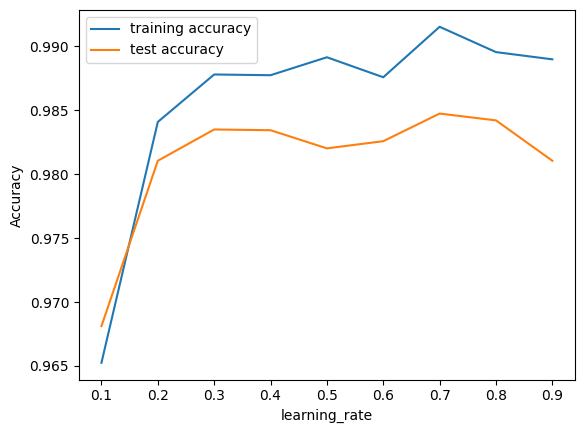

In [ ]:
training_accuracy = []
test_accuracy = []
r = []
# try learning_rate from 0.1 to 0.9
rate = range(1, 10)
for n in rate:
  # fit the model
  gbrt = GradientBoostingRegressor(learning_rate=n*0.1)
  gbrt.fit(X_train, y_train)
  r.append(n*0.1)
  # record training set accuracy
  training_accuracy.append(gbrt.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(gbrt.score(X_test, y_test))

#plotting the training & testing accuracy for learning_rate from 0.1 to 0.9
plt.plot(r, training_accuracy, label="training accuracy")
plt.plot(r, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
plt.legend()

XGBoost

In [ ]:
#XGBoost Regression model
from xgboost import XGBRegressor

# instantiate the model
xgb = XGBRegressor(learning_rate=0.2,max_depth=4)
#fit the model
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = xgb.score(X_train, y_train)
acc_test_xgb = xgb.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_xgb))

print("XGBoost Regression: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Regression: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print('\nXGBoost Regression: The RMSE of the training set is: ', rmse_train_xgb)
print('XGBoost Regression: The RMSE of the testing set is: ', rmse_test_xgb)

XGBoost Regression: Accuracy on training Data: 0.993
XGBoost Regression: Accuracy on test Data: 0.991

XGBoost Regression: The RMSE of the training set is:  0.12400200175106595
XGBoost Regression: The RMSE of the testing set is:  0.14855275622250436


In [ ]:
storeResults('XGBoost Regression',acc_train_xgb, acc_test_xgb, rmse_train_xgb, rmse_test_xgb)

MultiLayer Perceptron - MLP

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPRegressor

# instantiate the model
mlp = MLPRegressor(hidden_layer_sizes=([100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=[100, 100])

In [ ]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_mlp = mlp.score(X_train, y_train)
acc_test_mlp = mlp.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_mlp))

print("Multilayer Perceptron Regression: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptron Regression: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print('\nMultilayer Perceptron Regression: The RMSE of the training set is: ', rmse_train_mlp)
print('Multilayer Perceptron Regression: The RMSE of the testing set is: ', rmse_test_mlp)

Multilayer Perceptron Regression: Accuracy on training Data: 0.814
Multilayer Perceptron Regression: Accuracy on test Data: 0.835

Multilayer Perceptron Regression: The RMSE of the training set is:  0.6548691497633171
Multilayer Perceptron Regression: The RMSE of the testing set is:  0.619976617496581


In [ ]:
storeResults('Multilayer Perceptron Regression',acc_train_mlp, acc_test_mlp, rmse_train_mlp, rmse_test_mlp)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# K-Nearest Neighbors model
knn = KNeighborsRegressor(n_neighbors=5)

# fit the model
knn.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_knn = knn.predict(X_test)
y_train_knn = knn.predict(X_train)

#computing the accuracy of the model performance
acc_train_knn = knn.score(X_train, y_train)
acc_test_knn = knn.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("K-Nearest Neighbors Regression: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors Regression: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nK-Nearest Neighbors Regression: The RMSE of the training set is:', rmse_train_knn)
print('K-Nearest Neighbors Regression: The RMSE of the testing set is:', rmse_test_knn)


K-Nearest Neighbors Regression: Accuracy on training Data: 0.837
K-Nearest Neighbors Regression: Accuracy on test Data: 0.761

K-Nearest Neighbors Regression: The RMSE of the training set is: 0.6137317443855856
K-Nearest Neighbors Regression: The RMSE of the testing set is: 0.747342549890207


Custom Ensemble - SuperLearner

In [ ]:
storeResults('K-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

In [ ]:
# Ensemble model
from sklearn.ensemble import VotingRegressor
ensemble = VotingRegressor(estimators=[('mlp', mlp), ('lr', lr), ('knn', knn)])

# fit the model
ensemble.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_en = ensemble.predict(X_test)
y_train_en = ensemble.predict(X_train)

#computing the accuracy of the model performance
acc_train_en = ensemble.score(X_train, y_train)
acc_test_en = ensemble.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_en = np.sqrt(mean_squared_error(y_train, y_train_en))
rmse_test_en = np.sqrt(mean_squared_error(y_test, y_test_en))

print("Custom Ensemble: Accuracy on training Data: {:.3f}".format(acc_train_en))
print("Custom Ensemble: Accuracy on test Data: {:.3f}".format(acc_test_en))
print('\nCustom Ensemble: The RMSE of the training set is:', rmse_train_en)
print('Custom Ensemble: The RMSE of the testing set is:', rmse_test_en)


Custom Ensemble: Accuracy on training Data: 0.809
Custom Ensemble: Accuracy on test Data: 0.797

Custom Ensemble: The RMSE of the training set is: 0.6651476897560982
Custom Ensemble: The RMSE of the testing set is: 0.6885510575079525


In [ ]:
storeResults('Ensemble', acc_train_en, acc_test_en, rmse_train_en, rmse_test_en)

Results Comparison

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [ ]:
results

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,Linear Regression,0.244,0.260,1.322,1.314
1,Decision Tree,0.967,0.957,0.278,0.317
2,Random Forest,0.983,0.979,0.199,0.220
3,Gradient Boosted Regression,0.989,0.982,0.158,0.205
4,XGBoost Regression,0.993,0.991,0.124,0.149
5,Multilayer Perceptron Regression,0.814,0.835,0.655,0.620
6,K-Nearest Neighbors Regression,0.837,0.761,0.614,0.747
7,Ensemble,0.809,0.797,0.665,0.689


In [ ]:
#Sorting the df on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
4,XGBoost Regression,0.993,0.991,0.124,0.149
3,Gradient Boosted Regression,0.989,0.982,0.158,0.205
2,Random Forest,0.983,0.979,0.199,0.220
1,Decision Tree,0.967,0.957,0.278,0.317
5,Multilayer Perceptron Regression,0.814,0.835,0.655,0.620
7,Ensemble,0.809,0.797,0.665,0.689
6,K-Nearest Neighbors Regression,0.837,0.761,0.614,0.747
0,Linear Regression,0.244,0.260,1.322,1.314


Statistical Testing


In [ ]:
#improting required libraries
from scipy import stats

### **Test 1: To check the difference in suicide rates between male and female**
Using independent sample t-test to check the difference in suicide rates between male and female. The hypothesis statements for this test are:

**H0:** There is no difference in the suicide rates among male and female (Null).<br>
**H1:** There is difference in the suicide rates among male and female (Alternate).


In [ ]:
#collecting male suicide rate data
male = stat_data['suicide_rate'][stat_data['sex'] == 1]
male

0        6.710000
1        5.190000
3        4.590000
4        3.280000
8        0.730000
           ...   
29783    1.231287
29784    0.354230
29785    0.459827
29786    2.074689
29787    0.055575
Name: suicide_rate, Length: 15878, dtype: float64

In [ ]:
#collecting female suicide rate data
female = stat_data['suicide_rate'][stat_data['sex'] == 0]
female

2        4.830000
5        2.810000
6        2.150000
7        1.560000
9        0.000000
           ...   
31751    0.571032
31752    0.157435
31753    0.154096
31754    0.409094
31755    0.009263
Name: suicide_rate, Length: 15878, dtype: float64

In [ ]:
#calculating p value
ttest,pval = stats.ttest_rel(male, female)

if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


**Test Conclusion:** By performing T-test, the result obtained is to reject the null hypothesis. This basically means that there is different in suicide rates of male & female.

### **Test 2: To find out the dependence of suicide rate on the age.**
Finding out whether there is a dependence of suicide rate on the age using the Chi- Square test. The hypothesis statements for this test are:

**H0:** Suicide rate and age are independent (Null).<br>
**H1:** Suicide rate and age are dependent (Alternate).

In [ ]:
#Creating Contingency Table
contingency_table = pd.crosstab(stat_data.suicide_rate, stat_data.age)

In [ ]:
#Significance Level 5%
alpha=0.05

In [ ]:
chistat, p, dof, expected = stats.chi2_contingency(contingency_table )

In [ ]:
#critical_value
critical_value=stats.chi2.ppf(q=1-alpha,df=dof)
print('critical_value:',critical_value)

critical_value: 37775.54356423681


In [ ]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chistat)
print('critical_value:',critical_value)
print('p-value:',p)
#Here, pvalue = 0.0 and a low pvalue suggests that your sample provides enough evidence that you can reject  H0  for the entire population.

Significance level:  0.05
Degree of Freedom:  37325
chi-square statistic: 50166.95752174274
critical_value: 37775.54356423681
p-value: 0.0


In [ ]:
 #compare chi_square_statistic with critical_value and p-value which is the
 #probability of getting chi-square>0.09 (chi_square_statistic)
if chistat>=critical_value:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")

if p<=alpha:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")

Reject H0,There is a dependency between Age group & Suicide rate.
Reject H0,There is a dependency between Age group & Suicide rate.


**Test Conclusion:** By performing Chi- Square test, the result obtained is to reject the null hypothesis. This basically means that there is dependency between the Age group & Suicide rate.